
# <font color='blue'>Analysis of Different Risk Factors Associated with Lung Cancer levels and Prediction Using Machine Learning Models.</font>




### Connecting Python with SQL

In [111]:
myvars={}
with open('lvanamu-mysql-password') as myfile:
    for line in myfile:
        name, var=line.partition(':')[::2]
        myvars[name.strip()]=var.strip()
myvars.values()

dict_values(['lvanamu', 'lvanamu_db', 'philanthropists tackle earn'])

In [112]:
import MySQLdb
connection=MySQLdb.connect(host='localhost', user=myvars['DB username'], password=myvars['DB password'], db='I501_Fall2023_Sec28938_group09_db')
cursor = connection.cursor()
connection

<_mysql.connection open to 'localhost' at 0x5649ef2aebe0>

In [113]:
import pandas as pd
cursor.execute('select* from cancer_patient_data_sets_2');
rows=cursor.fetchall()
df=pd.read_sql('select* from cancer_patient_data_sets_2', connection)

/tmp/ipykernel_1470854/4185027163.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql('select* from cancer_patient_data_sets_2', connection)


In [114]:
df

,COL 1,COL 2,COL 3,COL 4,COL 5,COL 6,COL 7,COL 8,COL 9,COL 10,...,COL 16,COL 17,COL 18,COL 19,COL 20,COL 21,COL 22,COL 23,COL 24,COL 25
0,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
997,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
998,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
999,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


### Dimensions of the dataset

In [115]:
df.shape

(1001, 25)

### Dropping the first row as it has column names as COL 1, COL 2,...

In [116]:
df.columns = df.iloc[0]

# Drop the first row, as it is now the column names
df = df.drop(0)

# Reset the index, if needed
df = df.reset_index(drop=True)

# Display the resulting DataFrame
print(df)

0   Patient Id Age Gender Air Pollution Alcohol use Dust Allergy  \
0           P1  33      1             2           4            5   
1          P10  17      1             3           1            5   
2         P100  35      1             4           5            6   
3        P1000  37      1             7           7            7   
4         P101  46      1             6           8            7   
..         ...  ..    ...           ...         ...          ...   
995       P995  44      1             6           7            7   
996       P996  37      2             6           8            7   
997       P997  25      2             4           5            6   
998       P998  18      2             6           8            7   
999       P999  47      1             6           5            6   

0   OccuPational Hazards Genetic Risk chronic Lung Disease Balanced Diet  ...  \
0                      4            3                    2             2  ...   
1                    

### Summary of the dataframe

In [117]:
print('\n')
print(df.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   object
 2   Gender                    1000 non-null   object
 3   Air Pollution             1000 non-null   object
 4   Alcohol use               1000 non-null   object
 5   Dust Allergy              1000 non-null   object
 6   OccuPational Hazards      1000 non-null   object
 7   Genetic Risk              1000 non-null   object
 8   chronic Lung Disease      1000 non-null   object
 9   Balanced Diet             1000 non-null   object
 10  Obesity                   1000 non-null   object
 11  Smoking                   1000 non-null   object
 12  Passive Smoker            1000 non-null   object
 13  Chest Pain                1000 non-null   object
 14  Coughing of Blood      

### Changing the datatypes of the columns

In [118]:
df[["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy", "OccuPational Hazards", "Genetic Risk","Obesity", "Passive Smoker"]] = df[["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy", "OccuPational Hazards", "Genetic Risk","Obesity", "Passive Smoker"]].astype(int)
print(df)


0   Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

0    OccuPational Hazards  Genetic Risk chronic Lung Disease Balanced Diet  \
0                       4             3      

### Checking the datatypes of the columns

In [119]:
print(df.dtypes)

0
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease        object
Balanced Diet               object
Obesity                      int64
Smoking                     object
Passive Smoker               int64
Chest Pain                  object
Coughing of Blood           object
Fatigue                     object
Weight Loss                 object
Shortness of Breath         object
Wheezing                    object
Swallowing Difficulty       object
Clubbing of Finger Nails    object
Frequent Cold               object
Dry Cough                   object
Snoring                     object
Level                       object
dtype: object


### Checking for unique values in our dependent variable

In [120]:
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

### Assigning numerical values to our categorical dependent variable

In [121]:
df.Level = df.Level.replace("Low", 0)
df.Level = df.Level.replace("Medium", 1)
df.Level = df.Level.replace("High", 2)

df.Level = df.Level.astype("int64")

### Checking for null values

In [122]:
null_counts = df.isnull().sum()
print(null_counts)

0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


### Filtering required columns for data analysis

In [123]:
data = df[["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy", "OccuPational Hazards", "Genetic Risk","Obesity", "Passive Smoker", "Level"]]

### Checking for Outliers

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

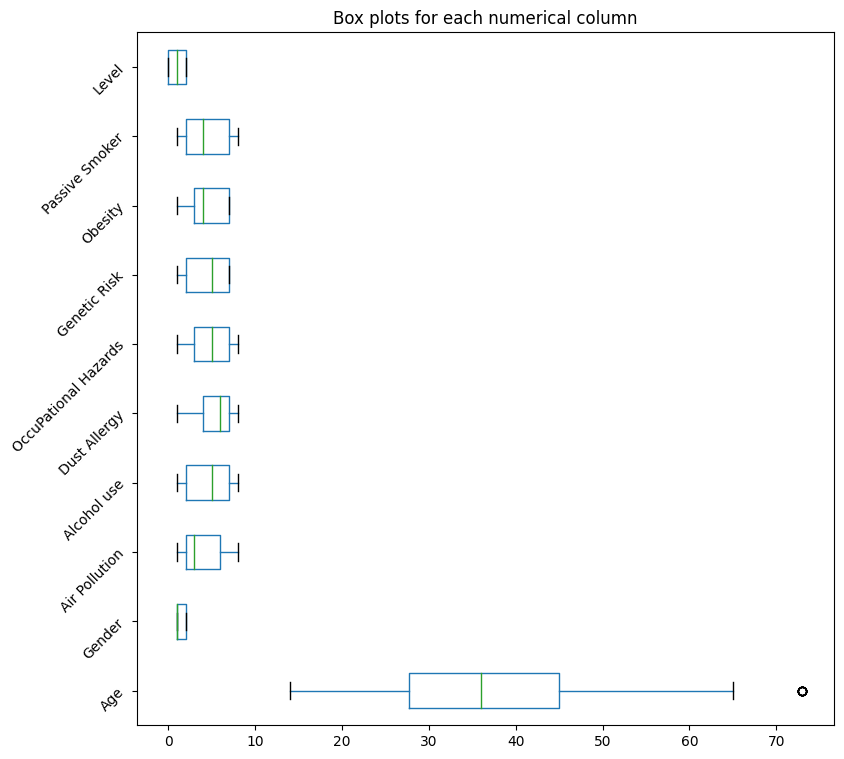

In [124]:
#Boxplot
import matplotlib.pyplot as plt
data.boxplot(rot=45, vert=False, figsize=(10, 6),grid=False)
plt.title('Box plots for each numerical column')
plt.show()

### Outlier Treatment (IQR)

#### Finding the number of outliers

In [125]:
# create a subset of columns to plot
columns_to_plot = data[['Age']]

# calculate the IQR for each column
Q1 = columns_to_plot.quantile(0.25)
Q3 = columns_to_plot.quantile(0.75)
IQR = Q3 - Q1

# define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# find outliers for each column
outliers = ((columns_to_plot < lower_bound) | (columns_to_plot > upper_bound)).any(axis=1)

# print the number of outliers for each column
print(outliers.sum())

10


#### Mean imputation and rechecking the number of outliers after outlier treatment

In [126]:
import numpy as np

# calculate the mean for each column
mean = columns_to_plot.mean()

# replace outliers with mean
for column in columns_to_plot.columns:
    outliers = ((columns_to_plot[column] < lower_bound[column]) | (columns_to_plot[column] > upper_bound[column]))
    columns_to_plot.loc[outliers, column] = mean[column]

# verify that there are no more outliers
outliers = ((columns_to_plot < lower_bound) | (columns_to_plot > upper_bound)).any(axis=1)
print(outliers.sum())

0


# Descriptive Statistics

In [127]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Obesity,Passive Smoker,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.465000,4.195000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,2.124921,2.311778,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,2.000000


# Data Visualization

#### Plotting a histogram of age distribution by level

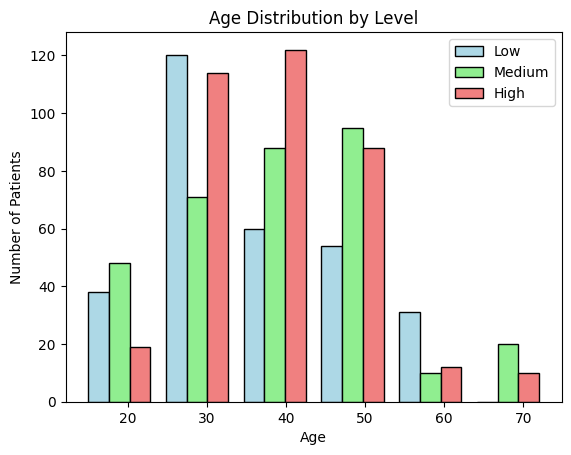

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate data by 'Level'
level_0 = data[data['Level'] == 0]['Age']
level_1 = data[data['Level'] == 1]['Age']
level_2 = data[data['Level'] == 2]['Age']

# Plot histograms for each 'Level'
plt.hist([level_0, level_1, level_2], color=['lightblue', 'lightgreen', 'lightcoral'], edgecolor='black', bins=6, label=['Low', 'Medium', 'High'])

# Add labels and title
plt.title('Age Distribution by Level')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend()

# Show the plot
plt.show()


### Plotting a pie chart of level (dependent variable)

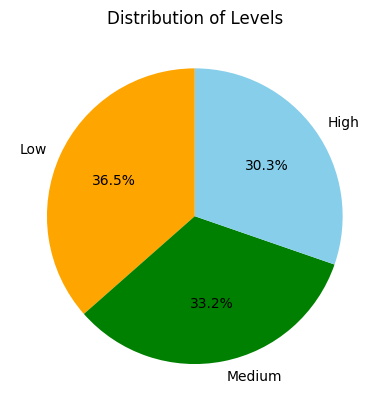

In [129]:

# Count the occurrences of each 'Level' value
level_counts = data['Level'].value_counts()

# Define custom labels
labels = ['Low', 'Medium', 'High']

# Plot pie chart with custom labels
plt.pie(level_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'green', 'skyblue'])

# Add a title
plt.title('Distribution of Levels')

# Display the pie chart
plt.show()


### Plotting a stacked bar chart of gender distribution across levels

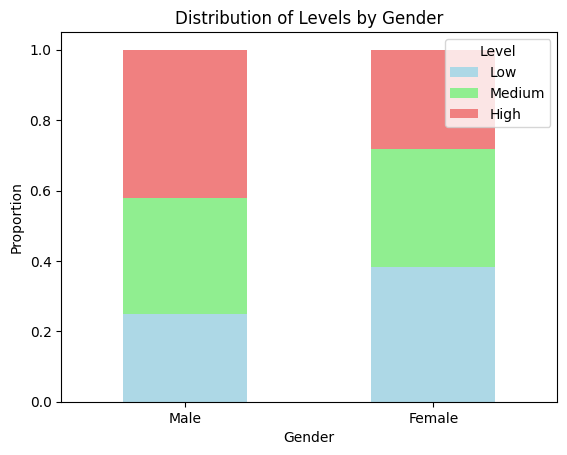

In [130]:

# Group by 'Gender' and 'Level' and calculate the proportion of each 'Level'
gender_level_counts = data.groupby(['Gender', 'Level']).size().unstack(fill_value=0)
gender_level_proportions = gender_level_counts.div(gender_level_counts.sum(axis=1), axis=0)

# Map levels to labels
level_labels = {0: 'Low', 1: 'Medium', 2: 'High'}
gender_level_proportions.columns = [level_labels[level] for level in gender_level_proportions.columns]

# Plot stacked bar chart
ax = gender_level_proportions.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'lightcoral'])

# Add labels and title
plt.title('Distribution of Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Level', loc='upper right')

# Change x-axis labels to 'Male' and 'Female'
plt.xticks(range(len(gender_level_proportions.index)), ['Male', 'Female'], rotation=0)

# Display the plot
plt.show()


### Installing necessary package

In [131]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [132]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


### Histogram of all the independent and dependent variables in data

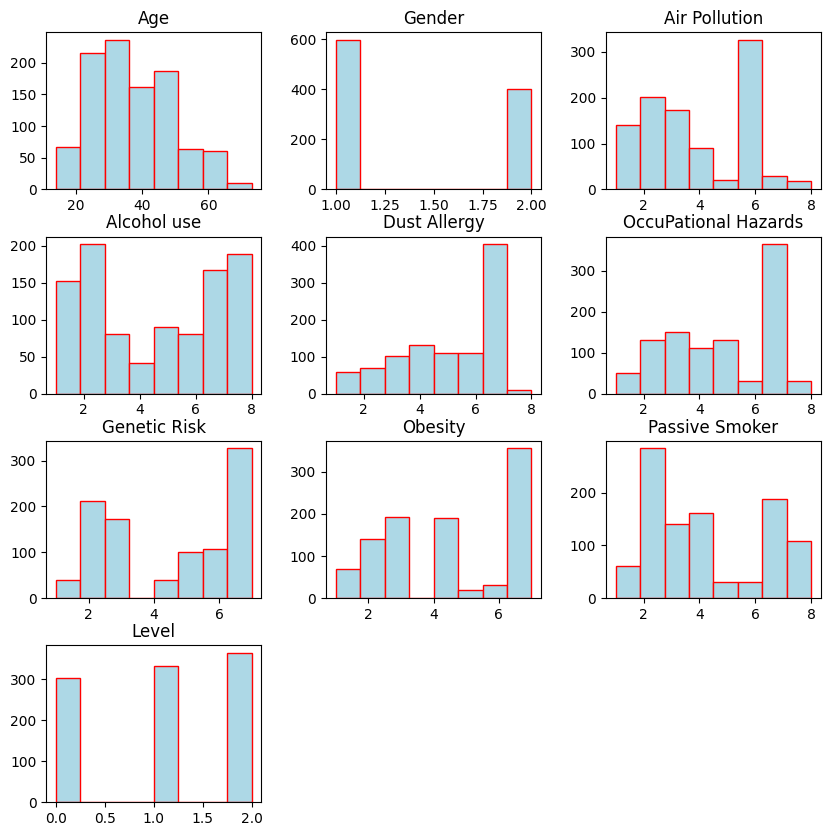

In [133]:
df_hist = data
df_hist.hist(figsize= [10,10], bins=8, grid=False, color='lightblue', edgecolor='red', lw=1)
plt.show()

### Correlation using heat map

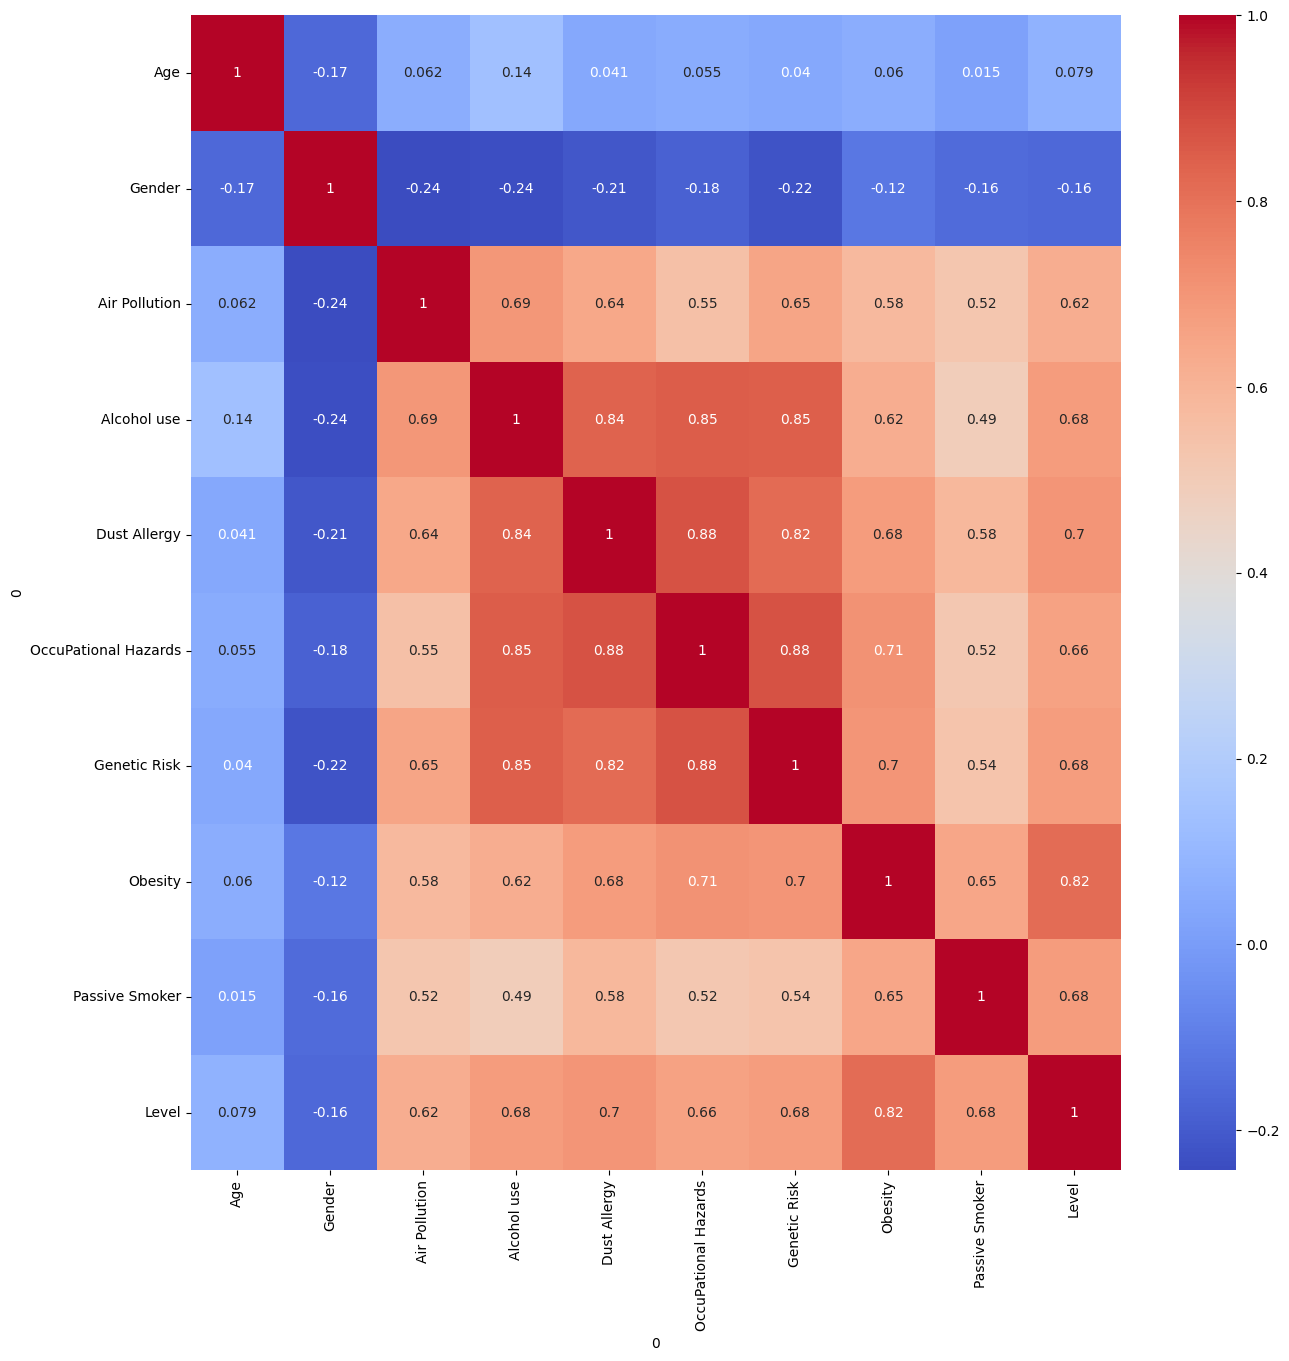

In [138]:
import seaborn as sns
corr_matrix = data.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.show()

# Statistical Analysis

In [139]:
!pip install factor-analyzer



Defaulting to user installation because normal site-packages is not writeable


In [140]:
from scipy import stats, linalg
from scipy.stats import shapiro
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

### Normality test Using Shapiro - Wilk Test

In [141]:
from scipy.stats import shapiro
data_columns = data[["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy", "OccuPational Hazards", "Genetic Risk","Obesity", "Passive Smoker"]]
stat, p = shapiro(data_columns)
print('Statistic= %.4f, p = %.8f' %(stat,p))

alpha = 0.05
if p > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic= 0.5514, p = 0.00000000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Normality test using stats

In [142]:
from scipy import stats 
alpha = 0.05
stat, p = stats.normaltest(data)
print('Statistic= %.4f, p = %.4f' %(stat.all(),p.all()))
if p.all() > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic= 1.0000, p = 0.0000
Sample does not look Gaussian (reject H0)


### Density Plot

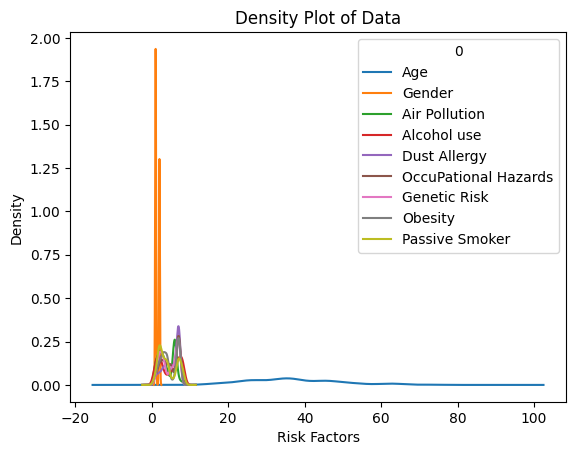

In [143]:

data_columns.plot(kind='density')
plt.xlabel('Risk Factors')
plt.ylabel('Density')
plt.title('Density Plot of Data')
plt.show()

### Density Plot without Age

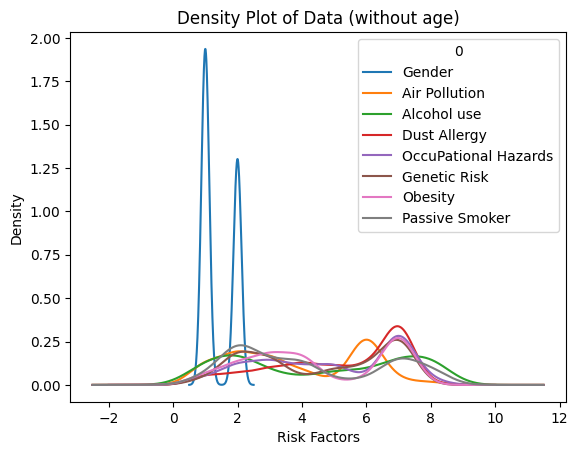

In [144]:
data_columns_no_age = data[["Gender", "Air Pollution", "Alcohol use", "Dust Allergy", "OccuPational Hazards", "Genetic Risk","Obesity", "Passive Smoker"]]
data_columns_no_age.plot(kind='density')
plt.xlabel('Risk Factors')
plt.ylabel('Density')
plt.title('Density Plot of Data (without age)')
plt.show()

## Chi-square test

In [145]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [146]:
data_chi = df[["Gender", "Air Pollution", "Alcohol use", "Dust Allergy", "OccuPational Hazards", "Genetic Risk","Obesity", "Passive Smoker","Level"]]
data_chi.head(2)

,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Obesity,Passive Smoker,Level
0,1,2,4,5,4,3,4,2,0
1,1,3,1,5,3,4,2,4,1


### To find if there is an association between Gender and Level

In [147]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_Gender = pd.crosstab(data_chi.Gender, data_chi.Level)

chi2, p_value, dof, expected = chi2_contingency(chi_Gender)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between gender and risk level (reject H0)")
else:
    print("There is no significant association between gender and risk level (fail to reject H0)")

Chi-square statistic: 27.224941429120687
p-value: 1.225121280277107e-06
Degrees of freedom: 2

There is a significant association between gender and risk level (reject H0)


### To find if there is an association between Air Pollution and Level

In [148]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_Air_Pollution = pd.crosstab(data_chi['Air Pollution'], data_chi['Level'])


chi2, p_value, dof, expected = chi2_contingency(chi_Air_Pollution)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between air pollution and risk level (reject H0)")
else:
    print("There is no significant association between air pollution and risk level (fail to reject H0)")

Chi-square statistic: 665.471018255482
p-value: 5.9971570004966065e-133
Degrees of freedom: 14

There is a significant association between air pollution and risk level (reject H0)


### To find if there is an association between Alcohol use and Level

In [149]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_Alcohol_use = pd.crosstab(data_chi['Alcohol use'], data_chi['Level'])


chi2, p_value, dof, expected = chi2_contingency(chi_Alcohol_use)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Alcohol use and risk level (reject H0)")
else:
    print("There is no significant association between Alcohol use and risk level (fail to reject H0)")

Chi-square statistic: 872.6917495190664
p-value: 3.0552472876211455e-177
Degrees of freedom: 14

There is a significant association between Alcohol use and risk level (reject H0)


### To find if there is an association between Dust Allergy and Level

In [150]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_Dust_Allergy = pd.crosstab(data_chi['Dust Allergy'], data_chi['Level'])


chi2, p_value, dof, expected = chi2_contingency(chi_Dust_Allergy)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Dust Allergy and risk level (reject H0)")
else:
    print("There is no significant association between Dust Allergy and risk level (fail to reject H0)")

Chi-square statistic: 736.3077272349504
p-value: 4.5579410253966125e-148
Degrees of freedom: 14

There is a significant association between Dust Allergy and risk level (reject H0)


### To find if there is an association between Occupational Hazards and Level

In [151]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_OccuPational_Hazards = pd.crosstab(data_chi['OccuPational Hazards'], data_chi['Level'])


chi2, p_value, dof, expected = chi2_contingency(chi_OccuPational_Hazards)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Occupational Hazards and risk level (reject H0)")
else:
    print("There is no significant association between Occupational Hazards and risk level (fail to reject H0)")

Chi-square statistic: 701.8241487841417
p-value: 1.0523203579242225e-140
Degrees of freedom: 14

There is a significant association between Occupational Hazards and risk level (reject H0)


### To find if there is an association between Genetic Risk and Level

In [152]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_Genetic_Risk = pd.crosstab(data_chi['Genetic Risk'], data_chi['Level'])


chi2, p_value, dof, expected = chi2_contingency(chi_Genetic_Risk)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Genetic Risk and risk level (reject H0)")
else:
    print("There is no significant association between Genetic Risk and risk level (fail to reject H0)")

Chi-square statistic: 632.1368442768942
p-value: 1.4449590655404463e-127
Degrees of freedom: 12

There is a significant association between Genetic Risk and risk level (reject H0)


### To find if there is an association between Obesity and Level

In [153]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_Obesity = pd.crosstab(data_chi['Obesity'], data_chi['Level'])


chi2, p_value, dof, expected = chi2_contingency(chi_Obesity)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Obesity and risk level (reject H0)")
else:
    print("There is no significant association between Obesity and risk level (fail to reject H0)")

Chi-square statistic: 985.1764863667074
p-value: 2.879418698066336e-203
Degrees of freedom: 12

There is a significant association between Obesity and risk level (reject H0)


### To find if there is an association between Passive Smoker and Level

In [154]:
from tabulate import tabulate
from scipy.stats import chi2_contingency
chi_Passive_Smoker = pd.crosstab(data_chi['Passive Smoker'], data_chi['Level'])


chi2, p_value, dof, expected = chi2_contingency(chi_Passive_Smoker)
chi2, p_value

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("")

# statistical significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Passive Smoking and risk level (reject H0)")
else:
    print("There is no significant association between Passive Smoking and risk level (fail to reject H0)")

Chi-square statistic: 977.6397112773594
p-value: 9.79821964724015e-200
Degrees of freedom: 14

There is a significant association between Passive Smoking and risk level (reject H0)


## Kruskal-Wallis test 

### To find if there is an association between Age (continuous variable ) and Level (categorical variable) 

In [155]:
from scipy.stats import kruskal

# Assuming 'Age' is continuous and 'Level' is categorical
grouped_data = [df['Age'][df['Level'] == level] for level in df['Level'].unique()]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*grouped_data)

# Print results
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

# Statistical significance
alpha = 0.05
if p_value < alpha:
    print('There is a significant association between the Age and Lung cancer risk level (Reject H0)')
else:
    print('There is no significant association between the Age and Lung cancer risk level (Fail to reject H0)')


Kruskal-Wallis statistic: 14.89720569957511
p-value: 0.0005822545412255028
There is a significant association between the Age and Lung cancer risk level (Reject H0)


#  Machine Learning

### Importing required packages and importing necessary libraries

In [156]:
pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [157]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [158]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTENC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import scikitplot as skplt

from sklearn.metrics import roc_curve, auc


In [160]:
import sklearn
print(sklearn.__version__)



1.3.2


In [161]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Feature Importance

In [162]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# load the data
df_m = df

# split the data into features (X) and target (y)
X = data.drop('Level', axis=1)
y = data['Level']

# create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the data
model.fit(X, y)

# calculate feature importance
importances = model.feature_importances_

# sort the features by importance
indices = importances.argsort()[::-1]

# print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")

Feature ranking:
1. Obesity: 0.5961819882431508
2. Alcohol use: 0.166599655464406
3. Passive Smoker: 0.07712921734807003
4. Age: 0.04089072665621992
5. Dust Allergy: 0.035499297036699656
6. OccuPational Hazards: 0.03327713003831379
7. Air Pollution: 0.031134286715314288
8. Genetic Risk: 0.015974348977048507
9. Gender: 0.003313349520777017


### Plotting a graph for feature importance of the variables in descending order

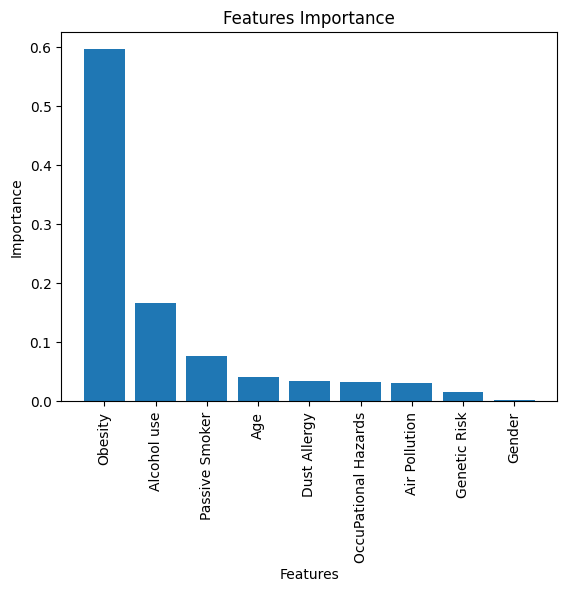

In [163]:
import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)

plt.title("Features Importance")
plt.xlabel("Features")
plt.ylabel("Importance")

plt.show()

## Pre-processing - Normalization of the data

In [164]:
from sklearn.preprocessing import MinMaxScaler
Model_df = df[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'Obesity', 'Passive Smoker', 'Level']]
# create a scaler object
scaler = MinMaxScaler()

# Fiting age column from 0-1
Model_df['Air Pollution'] = scaler.fit_transform(Model_df['Air Pollution'].values.reshape(-1, 1))
Model_df['Alcohol use'] = scaler.fit_transform(Model_df['Alcohol use'].values.reshape(-1, 1))
Model_df['Dust Allergy'] = scaler.fit_transform(Model_df['Dust Allergy'].values.reshape(-1, 1))
Model_df['OccuPational Hazards'] = scaler.fit_transform(Model_df['OccuPational Hazards'].values.reshape(-1, 1))
Model_df['Genetic Risk'] = scaler.fit_transform(Model_df['Genetic Risk'].values.reshape(-1, 1))
Model_df['Obesity'] = scaler.fit_transform(Model_df['Obesity'].values.reshape(-1, 1))
Model_df['Passive Smoker'] = scaler.fit_transform(Model_df['Passive Smoker'].values.reshape(-1, 1))

# Resulting dataframe
print(Model_df)

0    Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
0         0.142857     0.428571      0.571429              0.428571   
1         0.285714     0.000000      0.571429              0.285714   
2         0.428571     0.571429      0.714286              0.571429   
3         0.857143     0.857143      0.857143              0.857143   
4         0.714286     1.000000      0.857143              0.857143   
..             ...          ...           ...                   ...   
995       0.714286     0.857143      0.857143              0.857143   
996       0.714286     1.000000      0.857143              0.857143   
997       0.428571     0.571429      0.714286              0.571429   
998       0.714286     1.000000      0.857143              0.857143   
999       0.714286     0.571429      0.714286              0.571429   

0    Genetic Risk   Obesity  Passive Smoker  Level  
0        0.333333  0.500000        0.142857      0  
1        0.500000  0.166667        0.4285

/tmp/ipykernel_1470854/1179805896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df['Air Pollution'] = scaler.fit_transform(Model_df['Air Pollution'].values.reshape(-1, 1))
/tmp/ipykernel_1470854/1179805896.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Model_df['Alcohol use'] = scaler.fit_transform(Model_df['Alcohol use'].values.reshape(-1, 1))
/tmp/ipykernel_1470854/1179805896.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

### Defining dependent and independent varaibles

In [165]:

y = Model_df['Level']
x = Model_df.filter(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'Obesity', 'Passive Smoker'])


### Splitting the data into train and test data (80, 20)

In [166]:
 #Training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)

### Implementing the SMOTE technique and resampling the train data

In [167]:
from imblearn.over_sampling import SMOTE

x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train)
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.20, random_state=30)

In [168]:
print(y_train_resampled.shape)
y_train_resampled.value_counts()

(864,)


Level
0    288
2    288
1    288
Name: count, dtype: int64

## Logistic regression modelling

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Create a logistic regression model
logisticRegr = LogisticRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logisticRegr, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the logistic regression model on the training data
logisticRegr.fit(x_train, y_train)

# Predict on the test data
lg_pred = logisticRegr.predict(x_test)
from sklearn.metrics import accuracy_score
lg_accuracy = accuracy_score(y_test, lg_pred) * 100
print('Accuracy: ', lg_accuracy)

# Print model performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, lg_pred))

Cross-validation scores: [0.83453237 0.82608696 0.8115942  0.76811594 0.77536232]
Mean cross-validation score: 0.803138358878115
Accuracy:  78.61271676300578
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        65
           1       0.71      0.60      0.65        57
           2       0.89      1.00      0.94        51

    accuracy                           0.79       173
   macro avg       0.78      0.79      0.79       173
weighted avg       0.78      0.79      0.78       173



## Confusion matrix for Logistric Regression

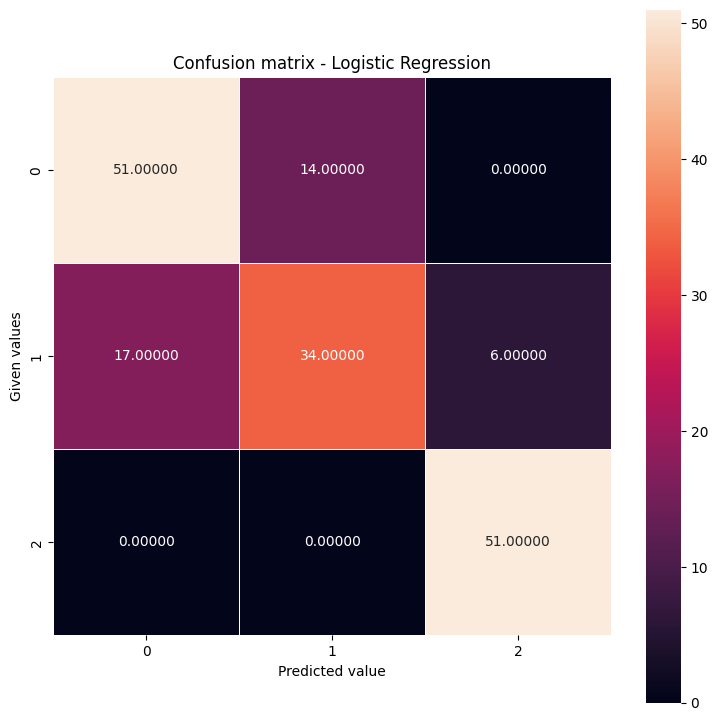

In [170]:
#Constructing confusion matrix
plt.figure(figsize=(9,9))
conf_mat = metrics.confusion_matrix(y_test, lg_pred)
sns.heatmap(conf_mat, annot=True, fmt=".5f", linewidths=.7, square=True);
plt.xlabel('Predicted value')
plt.ylabel('Given values')
plt.title('Confusion matrix - Logistic Regression')
plt.show()

## Decision Tree Classifier Model

In [171]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

#fit the model
dtc = DecisionTreeClassifier()

dtc_scores = cross_val_score(dtc, x_train, y_train, cv=5)
print("DTC Classification Model")
print("CV scores: ", dtc_scores)
print("Mean CV accuracy: {:.2f}".format(dtc_scores.mean()))
print(" ")

dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)

#Model performance
print("Decision Tree Classification Model")
#print('Mean squared error: %.2f' % mean_squared_error(y_test, dtc_pred))
#print('Coefficient of determination: %.2f' % r2_score(y_test, dtc_pred))

from sklearn.metrics import accuracy_score
dtc_accuracy = accuracy_score(y_test, dtc_pred) * 100
print('Accuracy: ', dtc_accuracy)

#Bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, dtc_pred))
print("")

DTC Classification Model
CV scores:  [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.00
 
Decision Tree Classification Model
Accuracy:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        51

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173




## Confusion matrix for Decision Tree Classfier Model

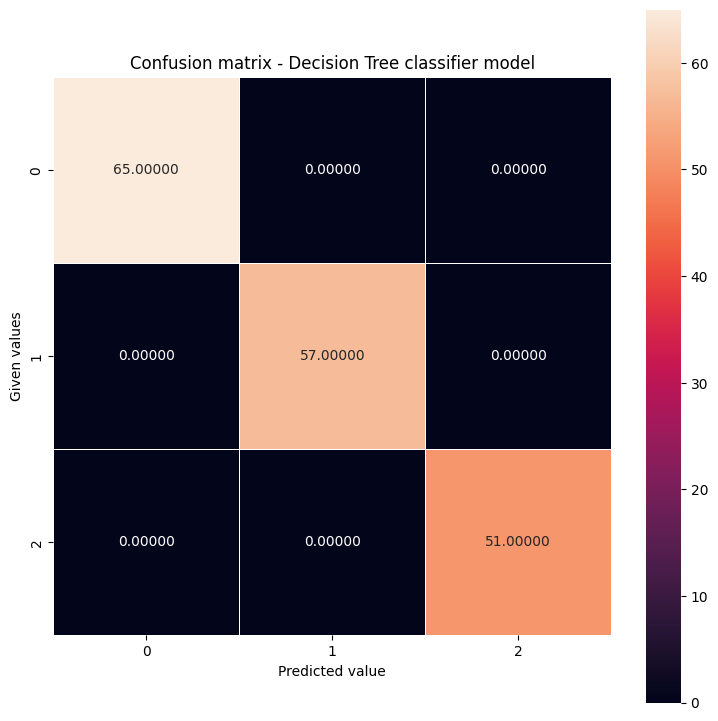

In [172]:
#Constructing confusion matrix
plt.figure(figsize=(9,9))
conf_mat = metrics.confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_mat, annot=True, fmt=".5f", linewidths=.7, square=True);
plt.xlabel('Predicted value')
plt.ylabel('Given values')
plt.title('Confusion matrix - Decision Tree classifier model')
plt.show()

## Gaussian Naive Bayes classifier 

In [173]:
#Gaussian Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB


GNB = GaussianNB()
GNB.fit(x_train, y_train)


GNB_scores = cross_val_score(GNB, x_train, y_train, cv=6)
print("Gaussian Naive Bayes")
print("CV scores: ", GNB_scores)
print("Mean CV accuracy: {:.2f}".format(GNB_scores.mean()))
print(" ")

dtc.fit(x_train, y_train)
GNB_pred = GNB.predict(x_test)

#Model performance
print("Gaussian Naive Bayes classifier Model")
#print('Mean squared error: %.2f' % mean_squared_error(y_test, GNB_pred))
#print('Coefficient of determination: %.2f' % r2_score(y_test, GNB_pred))

from sklearn.metrics import accuracy_score
GNB_accuracy = accuracy_score(y_test, GNB_pred) * 100
print('Accuracy: ', GNB_accuracy)

#Bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, GNB_pred))
print(" ")

Gaussian Naive Bayes
CV scores:  [0.65517241 0.67826087 0.51304348 0.56521739 0.62608696 0.6       ]
Mean CV accuracy: 0.61
 
Gaussian Naive Bayes classifier Model
Accuracy:  63.58381502890174
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        65
           1       0.41      0.23      0.29        57
           2       0.70      0.86      0.77        51

    accuracy                           0.64       173
   macro avg       0.59      0.64      0.60       173
weighted avg       0.60      0.64      0.60       173

 


## Confusion matrix for Naive Bayes Classifier

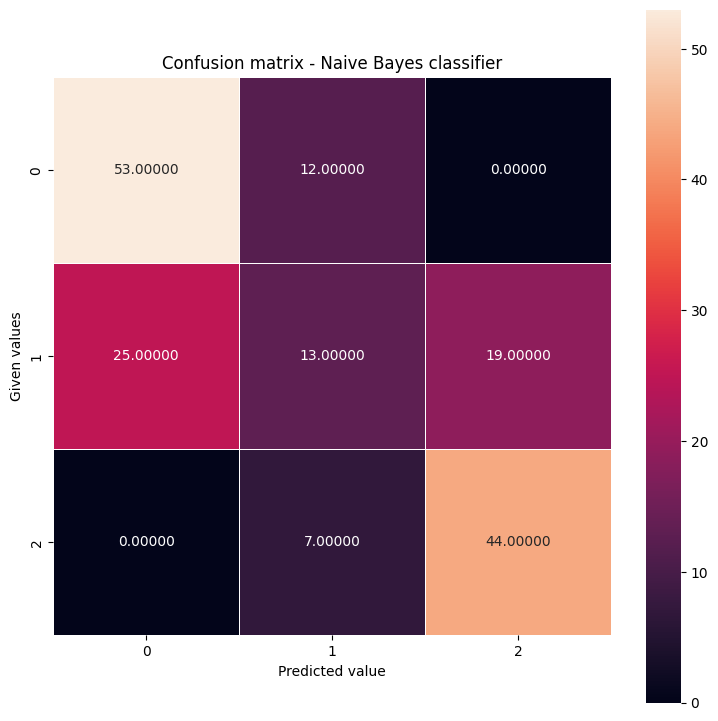

In [174]:
#Constructing confusion matrix
plt.figure(figsize=(9,9))
conf_mat = metrics.confusion_matrix(y_test, GNB_pred)
sns.heatmap(conf_mat, annot=True, fmt=".5f", linewidths=.7, square=True);
plt.xlabel('Predicted value')
plt.ylabel('Given values')
plt.title('Confusion matrix - Naive Bayes classifier')
plt.show()

## Random Forest Classification

In [175]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc_scores = cross_val_score(rfc, x_train, y_train, cv=5)
print("Random Forest Classification Model")
print("CV scores: ", rfc_scores)
print("Mean CV accuracy: {:.2f}".format(rfc_scores.mean()))
print(" ")
                        
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score
rfc_accuracy = accuracy_score(y_test, rfc_pred) * 100
print('Accuracy: ', rfc_accuracy)

#Bar plot of the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))
print("")

Random Forest Classification Model
CV scores:  [1. 1. 1. 1. 1.]
Mean CV accuracy: 1.00
 
Accuracy:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        51

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173




## Confusion matrix for Random Forest Classifier

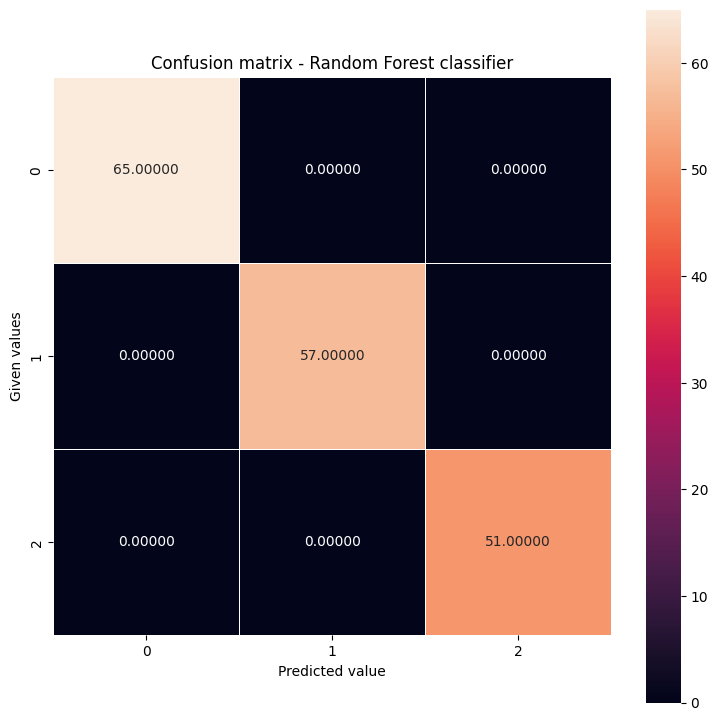

In [176]:
#Constructing confusion matrix
plt.figure(figsize=(9,9))
conf_mat = metrics.confusion_matrix(y_test, rfc_pred)
sns.heatmap(conf_mat, annot=True, fmt=".5f", linewidths=.7, square=True);
plt.xlabel('Predicted value')
plt.ylabel('Given values')
plt.title('Confusion matrix - Random Forest classifier')
plt.show()

# ROC curve

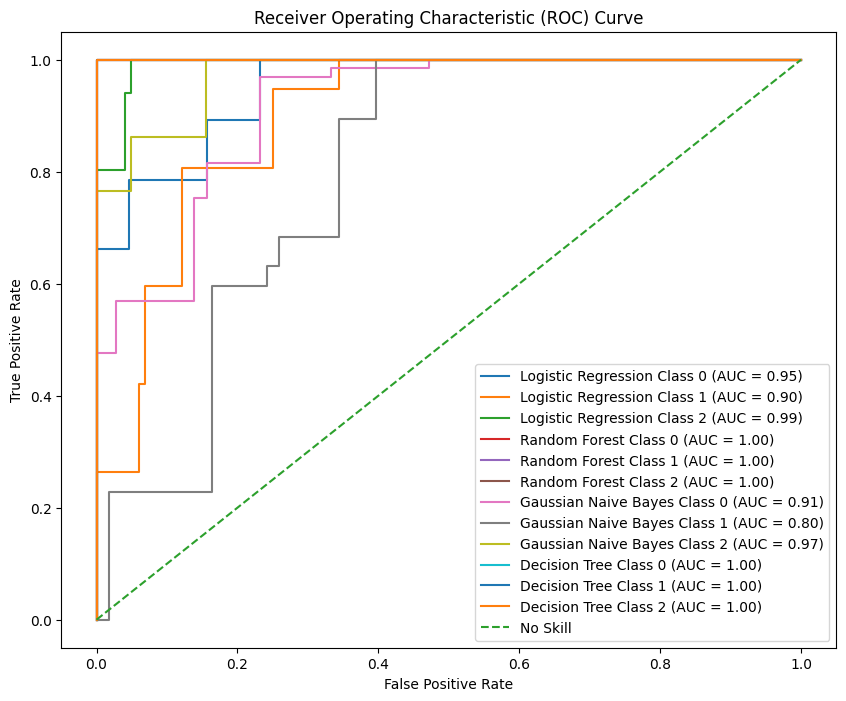

In [177]:
from sklearn.metrics import roc_auc_score

# Probabilities for each class
lg_probs = logisticRegr.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(logisticRegr.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, lg_probs[:, i])
    auc_score = roc_auc_score(y_test == i, lg_probs[:, i])
    plt.plot(fpr, tpr, label=f'Logistic Regression Class {i} (AUC = {auc_score:.2f})')

# Probabilities for each class
rfc_probs = rfc.predict_proba(x_test)

# Plot ROC curve for each class
for i in range(len(rfc.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, rfc_probs[:, i])
    auc_score = roc_auc_score(y_test == i, rfc_probs[:, i])
    plt.plot(fpr, tpr, label=f'Random Forest Class {i} (AUC = {auc_score:.2f})')

# Probabilities for each class
GNB_probs = GNB.predict_proba(x_test)

# Plot ROC curve for each class
for i in range(len(GNB.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, GNB_probs[:, i])
    auc_score = roc_auc_score(y_test == i, GNB_probs[:, i])
    plt.plot(fpr, tpr, label=f'Gaussian Naive Bayes Class {i} (AUC = {auc_score:.2f})')

# Probabilities for each class
dtc_probs = dtc.predict_proba(x_test)

# Plot ROC curve for each class
for i in range(len(dtc.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, dtc_probs[:, i])
    auc_score = roc_auc_score(y_test == i, dtc_probs[:, i])
    plt.plot(fpr, tpr, label=f'Decision Tree Class {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Accuracy of all the models

In [178]:
#Classification accuracy scores for three Machine learning models
lg_accuracy=accuracy_score (y_test, lg_pred)*100
print("The accuracy of the logistic regression model is:", lg_accuracy)

dtc_accuracy=accuracy_score (y_test, dtc_pred)*100
print("The accuracy of the Decision tree model is:", dtc_accuracy)

GNB_accuracy=accuracy_score (y_test, GNB_pred)*100
print("The accuracy of the Gaussian Naive Bayes Classsifier model is:", GNB_accuracy)

rfc_accuracy=accuracy_score (y_test, rfc_pred)*100
print("The accuracy of the Random Forest Classification model is:", rfc_accuracy)


The accuracy of the logistic regression model is: 78.61271676300578
The accuracy of the Decision tree model is: 100.0
The accuracy of the Gaussian Naive Bayes Classsifier model is: 63.58381502890174
The accuracy of the Random Forest Classification model is: 100.0


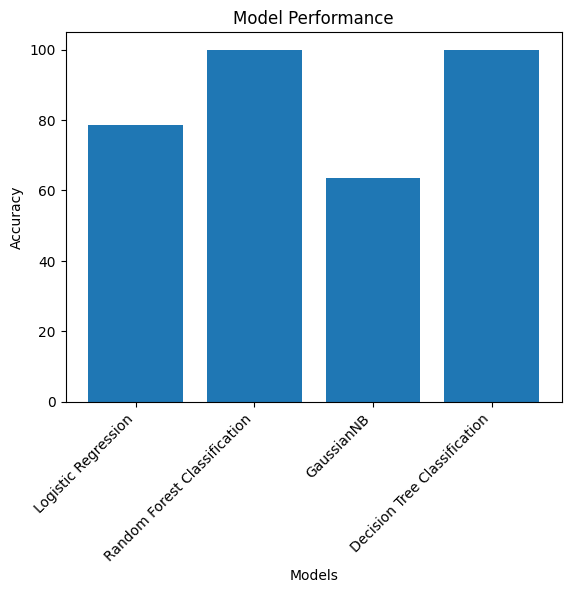

In [179]:
#Bar plot of to compare the model performance
models = ['Logistic Regression', 'Random Forest Classification', 'GaussianNB','Decision Tree Classification' ]
accuracy = [lg_accuracy, rfc_accuracy, GNB_accuracy,dtc_accuracy]
plt.bar(models, accuracy)
plt.title('Model Performance')
plt.xlabel('Models')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.show()

## Comparing Precision, Recall, F1 Score and support matrix of the machine learning models performed

In [180]:
# Get the classification report for the Logistic Regression
lg_report = classification_report(y_test, lg_pred, output_dict=True)
df_lg=pd.DataFrame(lg_report).transpose()

# Get the classification report for the Decision Tree model
dtc_report = classification_report(y_test, dtc_pred, output_dict=True)
df_dtc=pd.DataFrame(dtc_report).transpose()

# Get the classification report for the Gaussian Naive Bayes model
GNB_report = classification_report(y_test, GNB_pred, output_dict=True)
df_GNB=pd.DataFrame(GNB_report).transpose()

# Get the classification report for the Random Forest Classification model
rfc_report = classification_report(y_test, rfc_pred, output_dict=True)
df_rfc=pd.DataFrame(rfc_report).transpose()



#Concatenate the DataFrame
result_df = pd.concat([df_lg,df_dtc,df_GNB, df_rfc], axis=0, keys=['Logistic Regression', 'Decision Tree', 'Gaussian Naive Bayes','Random Forest Classification'])

#Format the DataFrame
result_df.columns=['Precision','Recall','f1-score','Support']
result_df.index.names=['Models', 'Class']

#Display the DataFrame
print(result_df)

                                           Precision    Recall  f1-score  \
Models                       Class                                         
Logistic Regression          0              0.750000  0.784615  0.766917   
                             1              0.708333  0.596491  0.647619   
                             2              0.894737  1.000000  0.944444   
                             accuracy       0.786127  0.786127  0.786127   
                             macro avg      0.784357  0.793702  0.786327   
                             weighted avg   0.778940  0.786127  0.779946   
Decision Tree                0              1.000000  1.000000  1.000000   
                             1              1.000000  1.000000  1.000000   
                             2              1.000000  1.000000  1.000000   
                             accuracy       1.000000  1.000000  1.000000   
                             macro avg      1.000000  1.000000  1.000000   
            